# Assignment: Clustering and Radial Basis Functions (RBF)

## - Anthony Wu and Harshitha Mallappa

### Problem 1

1. Create a multiple linear regression model that predicts the quarterback ratings based on 'Pass Yds', 'Yds/Att', 'Att', 'Cmp', 'Cmp percent', 'TD', and 'INT'. Normalize your values using MinMaxScaler(). You will use KernelRidge from the sklearn library. Set kernel to 'linear' and alpha to zero for regularization. Use default parameter values for everything else. Keep in mind that you need to add a column of ones to your data for bias. Report MSE for the training points.

In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Read the csv files
df_qb = pd.read_csv('QB2022_MLR.csv')
df_qbtest = pd.read_csv('QB2022_MLR_test.csv')

df_qb.head()

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
0,2022,Jared Goff,4438,7.6,587,382,65.1,29,7,99.3
1,2022,Josh Allen,4283,7.6,567,359,63.3,35,14,96.6
2,2022,Geno Smith,4282,7.5,572,399,69.8,30,11,100.9
3,2022,Trevor Lawrence,4113,7.0,584,387,66.3,25,8,95.2
4,2022,Jalen Hurts,3701,8.0,460,306,66.5,22,6,101.6


In [7]:
# Import MinMaxScaler, KernelRidge, and mse
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

# Use only the needed features and rate
x_train = df_qb.drop(columns = ['Year', 'Player', 'Rate'])
y_train = df_qb['Rate']

# Normalize values with MinMaxScaler
s = MinMaxScaler()
x_train_s = s.fit_transform(x_train)

# Add a column of ones for bias
bias = np.hstack((np.ones((x_train_s.shape[0], 1)), x_train_s))

# Create a mlr model with KernelRidge
kr_linear_model = KernelRidge(kernel='linear', alpha = 0)
kr_linear_model.fit(bias, y_train)

# Predict ratings based on training model
y_pred = kr_linear_model.predict(bias)

# Find the mean squared error
mse = mean_squared_error(y_train, y_pred)
print(f'Training points mse: {mse}')

Training points mse: 80.37008356584822


2. Create an RBF regression model that predicts the quarterback ratings based on 'Pass Yds', 'Yds/Att', 'Att', 'Cmp', 'Cmp percent', 'TD', and 'INT'. Normalize your values using MinMaxScaler(). You will use KernelRidge from the sklearn library. Set kernel to 'rbf' and alpha to zero for regularization. Use default parameter values for everything else. Keep in mind that you need to add a column of ones to your data for bias. Report MSE for the training points.

In [9]:
# Create a rbf model with KernelRidge
kr_rbf_model = KernelRidge(kernel='rbf', alpha = 0)
kr_rbf_model.fit(bias, y_train)

# Predict ratings based on training model
y_pred_rbf = kr_rbf_model.predict(bias)

# Find the mean squared error
mse_rbf = mean_squared_error(y_train, y_pred_rbf)
print(f'Training points mse: {mse_rbf}')

Training points mse: 1.8395951331057207e-14


3. Find and report the MSE error for test points in "QB2022_MLR_test.csv" using both models

In [11]:
# Find the features and values for the test file
x_test = df_qbtest.drop(columns = ['Year', 'Player', 'Rate'])
y_test = df_qbtest['Rate']

# Transform test features using MinMaxScaler()
x_test_s = s.transform(x_test)

# Add a column of ones for bias
bias_test = np.hstack((np.ones((x_test_s.shape[0], 1)), x_test_s))

# Predict ratings and find the mean squared error for both models using test points
y_test_pred_l = kr_linear_model.predict(bias_test)
test_mse_linear = mean_squared_error(y_test, y_test_pred_l)

y_test_pred_rbf = kr_rbf_model.predict(bias_test)
test_mse_rbf = mean_squared_error(y_test, y_test_pred_rbf)

print(f'MLR model mse: {test_mse_linear}')
print(f'RBF model mse: {test_mse_rbf}')

MLR model mse: 39.74004687499998
RBF model mse: 2348.8015778223225


4. Compare both the training and test errors for these two models, and report your observations in a couple of sentences.

For the multiple linear regression model, the test model has a low error compared to the training model. For the RBF regression model, the test model has a huge error compared to the training model. We conclude that the linear model is observed to be the better choice to predict ratings, while the RBF model is unsuitable for it.

### Problem 2

In this problem you will use the data file "kMeansData.csv" (x1 and x2 denote the input features) to create 3 clusters using unsupervised Lloyd's k-means algorithm.

The training should only stop if the difference between the cluster center locations in two consecutive iterations is less than 0.001 or if the number of iterations has reached 1000. For the initial selection of clusters locations choose 3 points from the data set randomly.

After convergence, report the final cluster centers. Plot the 3 clusters in different colors with cluster centers clearly marked on the plot.

In [18]:
import matplotlib.pyplot as plt
# Read the csv file
df_kmeans = pd.read_csv('kMeansData.csv')
df_kmeans.head()

,x1,x2
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


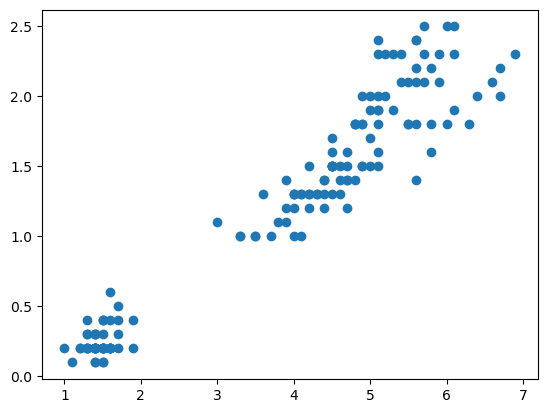

In [19]:
# Visualize the initial data points
x1 = df_kmeans['x1'].to_numpy()
x2 = df_kmeans['x2'].to_numpy()

plt.scatter(x1, x2)
plt.show()

In [20]:
# Set random seed to 42
np.random.seed(42)
# Create three random points
centers = df_kmeans.sample(n=3, random_state=42).values
print(centers)

# Create a color_labels list, which we would use later to plot the points
color_labels = []
consec = 0
# Set for loop iterations to 1000
for i in range(1000):

    # Find distances between inputs and centers
    distance_list = []
    for j in range(3):
        d = np.sqrt(np.square(centers[j][0] - x1) + np.square(centers[j][1] - x2))
        distance_list.append(d)

    # Find the indices of the nearest center for each point
    labels = []
    for k in range(len(x1)):
        min_index = np.argmin([distance_list[0][k], distance_list[1][k], distance_list[2][k]])
        labels.append(min_index)

    # Find the new centers using the rearranged points
    new_centers = []
    for m in range(3):
        x1_list = []
        x2_list = []
        for n in range(len(labels)):
            if (labels[n] == m):
                x1_list.append(x1[n])
                x2_list.append(x2[n])
        x1_mean = np.mean(x1_list)
        x2_mean = np.mean(x2_list)
        new_centers.append([x1_mean, x2_mean])

    # Find the Euclidean distance of the old and new centers 
    difference_list = []
    for m in range(3):
        diff = np.sqrt(np.square(new_centers[m][0] - centers[m][0]) + np.square(new_centers[m][1] - centers[m][1]))
        difference_list.append(diff)

    # Find if all center distances are less than 0.001
    d_list = np.array(difference_list)
    print(d_list)
    
    if ((d_list[0] < 0.001) and (d_list[1] < 0.001) and (d_list[2] < 0.001)):
        consec += 1
        if (consec == 2):
            color_labels = labels
            break
    else:
        consec = 0
    # If not less than 0.001, assign new centers as current centers
    centers = new_centers

centers, i

[[4.7 1.2]
 [1.7 0.3]
 [6.9 2.3]]
[0.35766244 0.21115562 0.85190197]
[0.18038161 0.03449398 0.2079048 ]
[0.07578458 0.         0.09495982]
[0.05600437 0.         0.07047666]
[0.04191613 0.         0.05072656]
[0.01376551 0.         0.01664469]
[0.01490149 0.         0.01687837]
[0. 0. 0.]
[0. 0. 0.]


([[4.292592592592594, 1.3592592592592592],
  [1.4620000000000002, 0.24599999999999997],
  [5.626086956521738, 2.0478260869565217]],
 8)

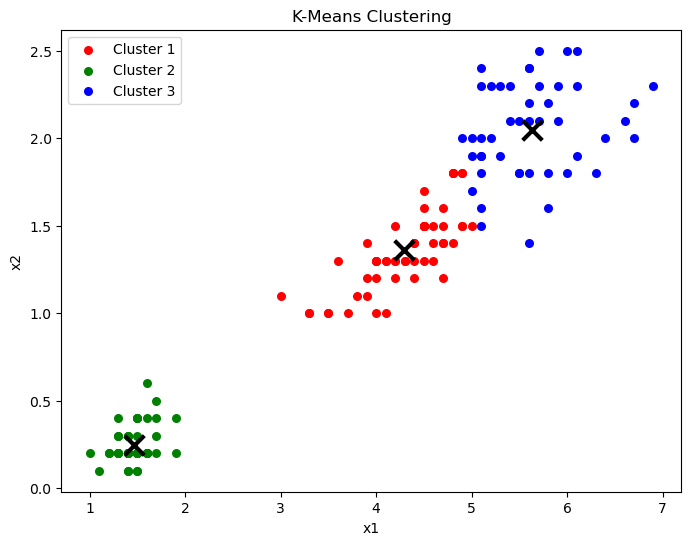

Final Cluster Centers:
 [[4.292592592592594, 1.3592592592592592], [1.4620000000000002, 0.24599999999999997], [5.626086956521738, 2.0478260869565217]]


In [21]:
# Plot results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(3):
    x1_color = []
    x2_color = []

    for j in range(len(color_labels)):
        if (color_labels[j] == i):
            x1_color.append(x1[j])
            x2_color.append(x2[j])
    
    plt.scatter(x1_color, x2_color, s=30, c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centers[i][0], centers[i][1], s=200, color='k', marker='x', linewidths=3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Print final cluster centers
print("Final Cluster Centers:\n", centers)

### Problem 3

In this problem you will use the data file "rbfClassification.csv" to create an RBF Network model for classification. x1 and x2 denote the input features and cls denotes the target class of the corresponding data points.

1. Use k-means clustering to determine the location of 2 cluster centers that you will use in your RBF model. Report the coordinate of the cluster centers.

In [25]:
# Read the csv file

df_rbfC = pd.read_csv('rbfClassification.csv')
df_rbfC

,x1,x2,cls
0,-2.427236,1.965984,1
1,2.382605,2.256614,0
2,-2.680668,2.379979,1
3,-2.620277,2.913823,0
4,1.513792,-2.312650,0
5,2.460894,-2.295289,1
6,0.921995,-2.685112,0
7,-0.505379,-2.301417,0
8,-0.279911,-0.520869,0
9,-1.742365,2.969098,1


In [26]:
# Use k-means clustering to find the cluster center
from sklearn.cluster import KMeans

x_values = df_rbfC[['x1','x2']]

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(x_values)

c_centers = kmeans.cluster_centers_
c_centers

array([[ 1.30641042, -0.37348593],
       [-2.26014807,  2.1265868 ]])

The cluster centers are (1.30641042, -0.37348593) and (-2.26014807, 2.1265868).

2. Train an RBF Network using gamma = 0.5. Report the correct classification rate of your model

In [29]:
# Apply the Gaussian RBF function

x1 = x_values['x1']
x2 = x_values['x2']

g1 = np.exp(-0.5 * (np.square(x1 - c_centers[0][0]) + np.square(x2 - c_centers[0][1])))
g2 = np.exp(-0.5 * (np.square(x1 - c_centers[1][0]) + np.square(x2 - c_centers[1][1])))

phi = np.column_stack((g1, g2))
phi

array([[6.08793323e-05, 9.73501568e-01],
       [1.76360525e-02, 2.06864905e-05],
       [7.97514495e-06, 8.86457406e-01],
       [2.01954677e-06, 6.87483886e-01],
       [1.49317256e-01, 4.24591574e-08],
       [8.10184158e-02, 8.20908647e-10],
       [6.42036590e-02, 5.93841810e-08],
       [3.02049504e-02, 1.18496230e-05],
       [2.81093152e-01, 4.23157358e-03],
       [3.59295533e-05, 6.13262746e-01],
       [1.81337832e-01, 3.33437392e-06],
       [1.46176368e-02, 1.29641495e-04],
       [7.99880409e-02, 1.52726142e-09],
       [7.45181394e-02, 6.62672257e-04],
       [4.82852655e-03, 2.43584163e-01],
       [2.21752059e-01, 2.19564679e-05],
       [1.04029724e-01, 2.10241949e-02],
       [9.57196993e-05, 3.45221216e-01],
       [4.64469067e-01, 1.27194771e-04],
       [1.89301890e-05, 6.90694304e-01]])

In [30]:
# Find the weights
y = df_rbfC[['cls']].values

w = np.linalg.inv(phi.T@phi)@phi.T@y
w

array([[0.21915424],
       [1.15858194]])

In [31]:
# Use the weights to predict cls for each point
pred_list = []

for i in range(len(phi)):
    y_pred = w[0]*phi[i][0] + w[1]*phi[i][1]
    if (y_pred < 0.5):
        pred_list.append(0)
    else:
        pred_list.append(1)
pred_list

[1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [32]:
# Determine the classification rate
accuracy = np.mean(pred_list == df_rbfC['cls'].values)
print(f'Correct classification rate: {accuracy:.2%}')

Correct classification rate: 75.00%
